In [1]:
# Dependencies
import csv
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
import seaborn as sns 
from scipy import stats
import matplotlib.dates as mdates
import scipy.stats as st
from pprint import pprint
from datetime import datetime


In [2]:
# Import the covid-19 dataset 
csv_path = ('Resources/owid-covid-data_updated.csv')
covid_data_df = pd.read_csv(csv_path)
covid_data_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,9/28/2020,3844,12,41.857,25,0,0.286,...,35973.781,0.0,0.000,11.62,0.0,0.0,0.000,0.00,76.29,0.000
1,AFG,Asia,Afghanistan,9/28/2020,39227,0,26.143,1453,0,1.714,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.50,64.83,0.498
2,AGO,Africa,Angola,9/28/2020,4672,82,97.286,171,4,2.714,...,5819.495,0.0,276.045,3.94,0.0,0.0,26.664,0.00,61.15,0.581
3,AIA,North America,Anguilla,9/28/2020,3,0,0.000,0,0,0.000,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.00,81.88,0.000
4,ALB,Europe,Albania,9/28/2020,13259,106,124.857,377,2,2.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,0.000,2.89,78.57,0.785


In [3]:
na_data = covid_data_df.loc[covid_data_df["continent"] == "North America",:]
na_data.head(10)
                               

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,9/28/2020,3844,12,41.857,25,0,0.286,...,35973.781,0.0,0.000,11.62,0.0,0.0,0.000,0.00,76.29,0.000
3,AIA,North America,Anguilla,9/28/2020,3,0,0.000,0,0,0.000,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.00,81.88,0.000
9,ATG,North America,Antigua and Barbuda,9/28/2020,101,0,0.714,3,0,0.000,...,21490.943,0.0,191.511,13.17,0.0,0.0,0.000,3.80,77.02,0.780
16,BES,North America,Bonaire Sint Eustatius and Saba,9/28/2020,85,0,7.000,1,0,0.000,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.00,77.79,0.000
21,BHS,North America,Bahamas,9/28/2020,3790,0,60.000,87,0,1.857,...,27717.847,0.0,235.954,13.17,3.1,20.4,0.000,2.90,73.92,0.807
24,BLZ,North America,Belize,9/28/2020,1854,29,32.429,24,0,0.429,...,7824.362,0.0,176.957,17.11,0.0,0.0,90.083,1.30,74.62,0.708
25,BMU,North America,Bermuda,9/28/2020,181,0,0.143,9,0,0.000,...,50669.315,0.0,139.547,13.00,0.0,0.0,0.000,0.00,82.59,0.000
28,BRB,North America,Barbados,9/28/2020,190,0,0.143,7,0,0.000,...,16978.068,0.0,170.050,13.57,1.9,14.5,88.469,5.80,79.19,0.800
33,CAN,North America,Canada,9/28/2020,153125,1454,1353.714,9268,6,7.286,...,44017.591,0.5,105.599,7.37,12.0,16.6,0.000,2.50,82.43,0.926
44,CRI,North America,Costa Rica,9/28/2020,72049,0,1191.000,828,0,17.429,...,15524.995,1.3,137.973,8.78,6.4,17.4,83.841,1.13,80.28,0.794


In [4]:
africa_data = covid_data_df.loc[covid_data_df["continent"] == "Africa",:]
africa_data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
2,AGO,Africa,Angola,9/28/2020,4672,82,97.286,171,4,2.714,...,5819.495,0.0,276.045,3.94,0.0,0.0,26.664,0.0,61.15,0.581
13,BDI,Africa,Burundi,9/28/2020,485,0,1.714,1,0,0.000,...,702.225,71.7,293.068,6.05,0.0,0.0,6.144,0.8,61.58,0.417
15,BEN,Africa,Benin,9/28/2020,2340,15,8.571,40,0,0.000,...,2064.236,49.6,235.848,0.99,0.6,12.3,11.035,0.5,61.77,0.515
17,BFA,Africa,Burkina Faso,9/28/2020,2008,35,23.143,56,0,0.000,...,1703.102,43.7,269.048,2.42,1.6,23.9,11.877,0.4,61.58,0.423
31,BWA,Africa,Botswana,9/28/2020,2921,0,50.571,16,0,0.429,...,15807.374,0.0,237.372,4.81,5.7,34.4,0.000,1.8,69.59,0.717
32,CAF,Africa,Central African Republic,9/28/2020,4806,0,1.857,62,0,0.000,...,661.240,0.0,435.727,6.10,0.0,0.0,16.603,1.0,53.28,0.367
37,CIV,Africa,Cote d'Ivoire,9/28/2020,19629,29,44.143,120,0,0.000,...,3601.006,28.2,303.740,2.42,0.0,0.0,19.351,0.0,57.78,0.492
38,CMR,Africa,Cameroon,9/28/2020,20735,0,43.429,418,0,0.286,...,3364.926,23.8,244.661,7.20,0.0,0.0,2.735,1.3,59.29,0.556
39,COD,Africa,Democratic Republic of Congo,9/28/2020,10611,19,13.857,270,0,0.000,...,808.133,77.1,318.949,6.10,0.0,0.0,4.472,0.0,60.68,0.457
40,COG,Africa,Congo,9/28/2020,5008,0,3.143,89,0,0.000,...,4881.406,37.0,344.094,7.20,1.7,52.3,47.964,0.0,64.57,0.606


In [5]:
#Total Deaths for North America 
total_deaths_na = na_data["total_deaths"].sum()
total_deaths_africa = na_data["total_deaths"].sum()



In [6]:
# Get total # of cases by continent
total_cases_group = covid_data_df.groupby(["continent"])["total_cases"].sum()
total_cases_group = pd.DataFrame(total_cases_group)
total_cases_group.head()


,total_cases
continent,
0,33178019
Africa,1461036
Asia,10350161
Europe,4040576
North America,8575751


In [7]:
# Get total # of death by continent
total_death_group = covid_data_df.groupby(["continent"])["total_deaths"].sum()
total_death_group = pd.DataFrame(total_death_group)
total_death_group


,total_deaths
continent,
0,998784
Africa,35160
Asia,189891
Europe,183438
North America,303569
Oceania,955
South America,248652


In [8]:
# merge dataframe of total cases and total death in each continent
#
merge_cases_df = pd.merge(total_cases_group,total_death_group, how="inner",on = "continent")
merge_cases_df.head()


,total_cases,total_deaths
continent,,
0,33178019,998784
Africa,1461036,35160
Asia,10350161,189891
Europe,4040576,183438
North America,8575751,303569


In [9]:
# Create dataframe for "life_expectancy" for each continent 
#
covid_data_df = pd.DataFrame(covid_data_df)
covid_data_df = covid_data_df.sort_values('continent', ascending=True)
covid_data_df = covid_data_df.drop_duplicates(subset='continent', keep='first')
df_life_expec = covid_data_df[['continent','life_expectancy']]
df_life_expec

,continent,life_expectancy
207,0,72.58
75,Africa,58.32
102,Asia,71.45
11,Europe,81.54
25,North America,82.59
138,Oceania,77.55
155,South America,74.25


In [10]:
merge_cases_life_df = pd.merge(df_life_expec, total_death_group, how="inner",on = "continent")
merge_cases_life_df.head()

,continent,life_expectancy,total_deaths
0,0,72.58,998784
1,Africa,58.32,35160
2,Asia,71.45,189891
3,Europe,81.54,183438
4,North America,82.59,303569


In [11]:
def linear_regress(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Fuction for annotating plot
#
def annotate_plt(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="blue")

The r-squared is : 0.09


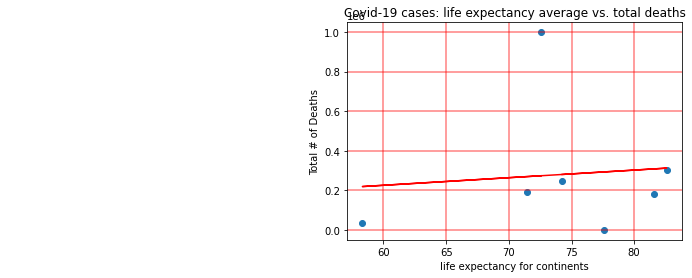

In [12]:
get_regress_life = linear_regress(merge_cases_life_df["life_expectancy"],
                             merge_cases_df["total_deaths"])

# Call annotate func
annotate_plt(get_regress_life, 30, 20)

# Set a title
plt.title("Covid-19 cases: life expectancy average vs. total deaths")

# Set xlabel
plt.xlabel("life expectancy for continents")

# Set ylabel
plt.ylabel("Total # of Deaths")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the figure
plt.savefig("Covid-19 cases: life expectancy average vs. total deaths.png")